In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve, f1_score, balanced_accuracy_score, accuracy_score
from  sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [4]:
def return_no_words(x):
    x = nltk.tokenize.word_tokenize(x)
    return len(x)

In [5]:
def report_results(results_path):
    results = pd.read_csv(results_path)
    # 1 prediction distribution of aggression
    # 0 negative prediction distribution of aggression
    plt.hist([results["y_predict_prob_1"],results["y_predict_prob_0"]])
    plt.ylim(0, 25000)

    # predict.prob scores
    fpr, tpr, thrshold = roc_curve(results["y_true_bool"], results["y_predict_prob_1"])
    roc_auc = auc(results["y_true_bool"], results["y_predict_prob_1"])
    print("AUC score", roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    # predict scores
    fpr, tpr, thrshold = roc_curve(results["y_true_binary"], results["y_prediction"])
    roc_auc = auc(results["y_true_binary"], results["y_prediction"])
    print("AUC score", roc_auc)
    # Confusion Matrix
    tn, fp, fn, tp = cm(y_true=results["y_true_binary"], y_pred=results["y_prediction"]).ravel()
    print("CM", tn, fp, fn, tp)
    F1_score = f1_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("F1-score", F1_score)
    #imbalanced accuracy score - NOT TO Trust
    imbalanced_accuracy_score = accuracy_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("imbalanced_accuracy_score", imbalanced_accuracy_score)

In [6]:
def dataset_features_analysis(data, no_features_to_return=10):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.pipeline import Pipeline
    pipe = Pipeline([('count',  CountVectorizer(ngram_range=(1,2), analyzer='word', max_features=10000)),
                         ('tfid',TfidfTransformer(norm='l2', sublinear_tf=True))]).fit(data)
    data_features = pipe.transform(data)
    print("Features mean", data_features.mean())
    sum_words = data_features.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in pipe['count'].vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    print("Most occuring features", words_freq[:no_features_to_return])
    return words_freq

# Attack data analysis

In [7]:
data = pd.read_csv("../shuffled_Combined_Wikipedia_twitter_kaggle_youtube_parsed_dataset.csv")

In [8]:
data['Text'] = data['Text'].apply(lambda x: str(x).replace("NEWLINE_TOKEN", " "))
data['Text'] = data['Text'].apply(lambda x: str(x).replace("TAB_TOKEN", " "))

In [9]:
len(data)

432026

In [10]:
len(data[data["oh_label"] == 1])

52304

In [11]:
len(data[data["oh_label"] == 0])

379722

In [12]:
#avergae number of words per post
data["No words"] = data["Text"].apply(lambda x : return_no_words(x))

In [13]:
print("mean",np.mean(data["No words"]))
print("STD", np.std(data["No words"]))

mean 78.98479026725244
STD 142.50891908787102


# Features analysis (Word)

In [15]:
words = []
numbers = []
for i in data:
    words.append(i[0])
    numbers.append(i[1])
pd.DataFrame({"all_data_features": words, "all_data_featurs_No": numbers}).to_csv("all_data_features.csv")

# All data dataset - linear - word - oh label

AUC score 0.9471724838086372


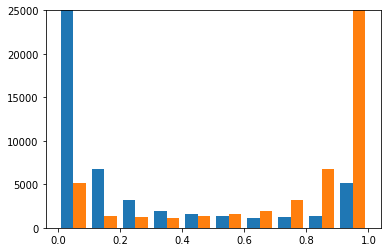

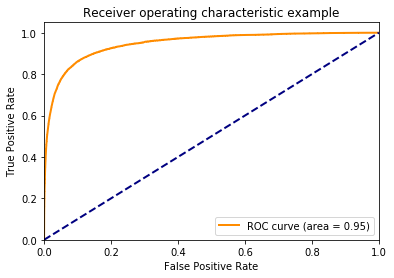

AUC score 0.8036370534576823
CM 93003 1959 4854 8191
F1-score 0.7062729036430264
imbalanced_accuracy_score 0.9369207551362412


In [16]:
report_results("linear_word_oh_shuffled_Combined_Wikipedia_twitter_kaggle_youtube_prediction_results.csv")

# All data linear char oh

AUC score 0.9142601147016338


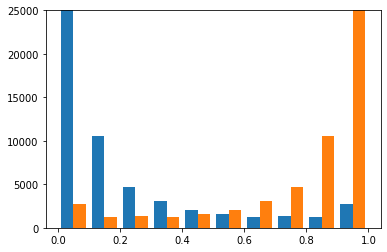

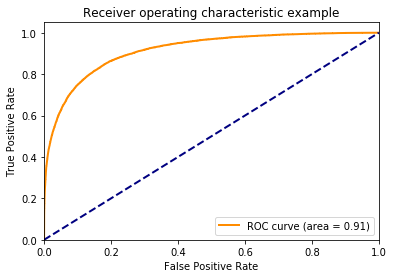

AUC score 0.7321669331357198
CM 93047 1913 6726 6321
F1-score 0.5940510314364927
imbalanced_accuracy_score 0.9200144435082911


In [24]:
report_results("linear_char_oh_shuffled_Combined_Wikipedia_twitter_kaggle_youtube_prediction_results.csv")

# All data mlp word oh

AUC score 0.9338045558639545


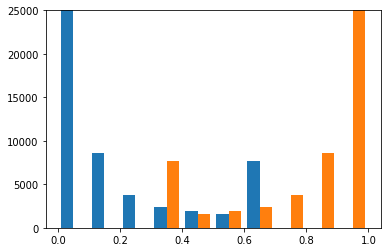

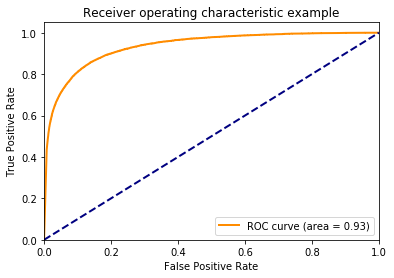

AUC score 0.7758829932419992
CM 93002 1788 5675 7542
F1-score 0.6690025280525126
imbalanced_accuracy_score 0.930902626681604


In [25]:
report_results("mlp_word_oh_shuffled_Combined_Wikipedia_twitter_kaggle_youtube_prediction_results.csv")

# All data mlp char oh

In [26]:
report_results("mlp_char_oh_shuffled_Combined_Wikipedia_twitter_kaggle_youtube_prediction_results.csv")

FileNotFoundError: [Errno 2] File b'mlp_char_oh_shuffled_Combined_Wikipedia_twitter_kaggle_youtube_prediction_results.csv' does not exist: b'mlp_char_oh_shuffled_Combined_Wikipedia_twitter_kaggle_youtube_prediction_results.csv'

# lstm all data word

AUC score 0.9571411887809451


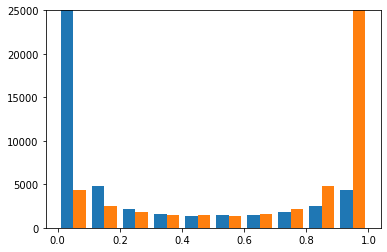

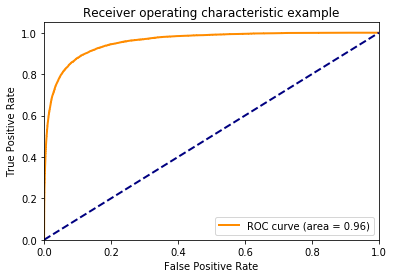

AUC score 0.8357538075024247
CM 92508 2381 3980 9138
F1-score 0.7418110971303324
imbalanced_accuracy_score 0.9411056690770042


In [27]:
report_results("lstm_word_oh_shuffled_Combined_Wikipedia_twitter_kaggle_youtube_prediction_results.csv")

# lstm all_data char

AUC score 0.8449560855020193


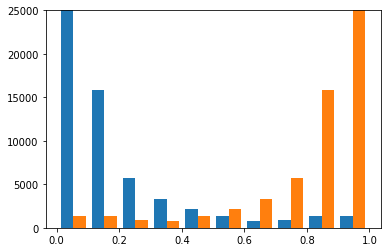

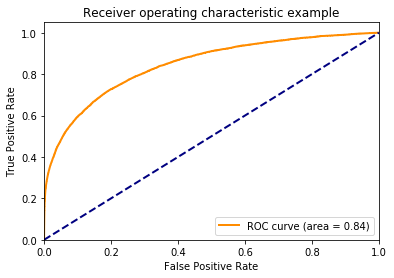

AUC score 0.6606008201903095
CM 93620 1394 8629 4364
F1-score 0.46546850834622155
imbalanced_accuracy_score 0.9072004592294944


In [28]:
report_results("lstm_char_oh_shuffled_Combined_Wikipedia_twitter_kaggle_youtube_prediction_results.csv")

# conv-lstm all data word

AUC score 0.9356542815490266


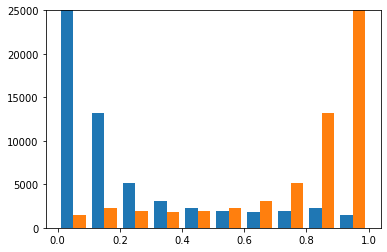

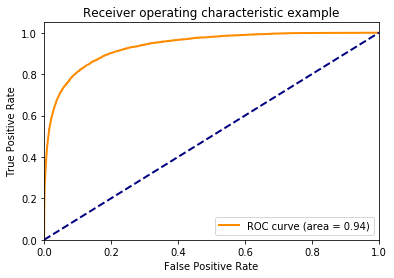

AUC score 0.7783217979685956
CM 93124 1953 5467 7463
F1-score 0.6679495211670993
imbalanced_accuracy_score 0.9313007490255262


In [29]:
report_results("conv_lstm_word_oh_shuffled_Combined_Wikipedia_twitter_kaggle_youtube_prediction_results.csv")

# conv-lstm all data char

AUC score 0.9366264641561043


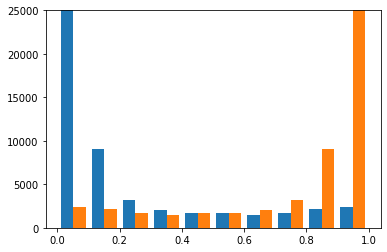

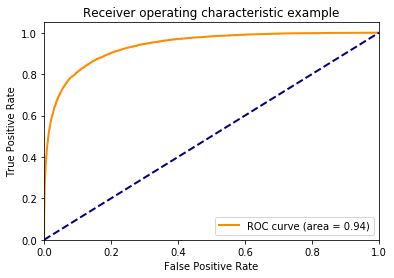

AUC score 0.7777927697406309
CM 93002 1971 5522 7512
F1-score 0.6672292046009682
imbalanced_accuracy_score 0.9306248669067746


In [31]:
report_results("conv_lstm_char_oh_shuffled_Combined_Wikipedia_twitter_kaggle_youtube_prediction_results.csv")

# statistical analysis

In [32]:
#			Classifier2 Correct,	Classifier2 Incorrect
#Classifier1 Correct 	Yes/Yes					Yes/No
#Classifier1 Incorrect 	No/Yes 					No/No

In [ ]:
Linear_mlp_cont_table = []